<a href="https://colab.research.google.com/github/leoserpa/scripts/blob/main/Spotify_dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de dados de músicas do Spotify

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from sklearn import svm

In [ ]:
# # importar os arquivos 
dataset  = pd.read_csv('data.csv', sep=',')


In [ ]:
# ver as primeiras entradas
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Análise de Dados

In [ ]:
# checando valores Missing
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
# Resumo Estatístico da base
# Somente dados numéricos 
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
# lista de estilos disponiveis de Matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

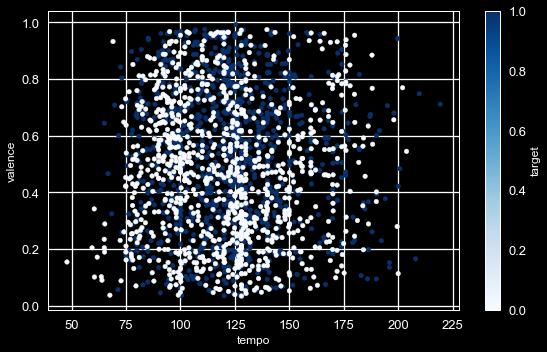

In [ ]:
%matplotlib inline
from matplotlib import style
style.use("dark_background")
fig, ax = plt.subplots(figsize = (8,5))
dataset.plot.scatter(x= 'tempo', y='valence', c='target', colormap='Blues', ax=ax)
plt.tight_layout();

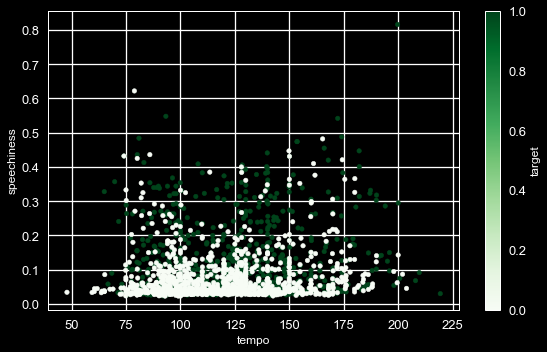

In [ ]:
%matplotlib inline
from matplotlib import style
style.use("dark_background")
fig, ax = plt.subplots(figsize = (8,5))
dataset.plot.scatter(x= 'tempo', y='speechiness', c='target', colormap='Greens', ax=ax)
plt.tight_layout();

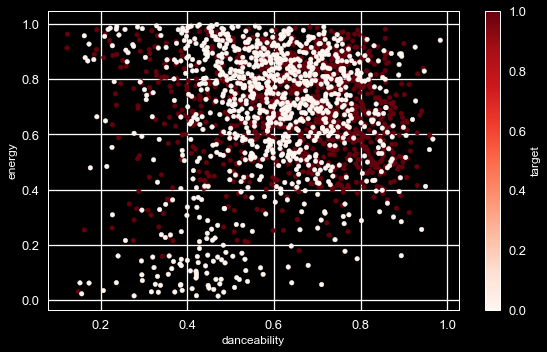

In [ ]:
%matplotlib inline
from matplotlib import style
style.use("dark_background")
fig, ax = plt.subplots(figsize = (8,5))
dataset.plot.scatter(x= 'danceability', y='energy', c='target', colormap='Reds', ax=ax)
plt.tight_layout();

## Separa a classe dos dados

In [ ]:
classes =dataset['target']
dataset.drop('target', axis=1, inplace=True)


In [ ]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys


## Pre-processamento de dados

In [ ]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
        return 0

In [ ]:
# Remove features
remove_features(['song_title'])
remove_features(['id'])

0

In [ ]:
# Visualizando o dataset
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [ ]:
# Visualizando o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


# Label Encoder

* Técnica para codificar valores categoricos em numéricos
* Um exemplo seria: a lista de cores: _(‘branco’,’preto’,’amarelo’,’vermelho’,'branco')_
* Após aplicar o LabelEncoder esta seria algo como __(1,2,3,4,1)__

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
inteiros = enc.fit_transform(dataset['artist'])

In [ ]:
# Visualizando valores únicos.
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
# Criar uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [ ]:
# Visualizando o dataset alterado.
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


# One Hot Encoding

* Técnica usada para codificar valores categóricos em númericos.
* Cria uma matriz de presença.
* Resolve o problema __ordenação__ nos dados gerados pelo LabelEncoder.

In [ ]:
# Apague a coluna 'Artist'
remove_features(['artist'])

0

In [ ]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [ ]:
# Importa o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Instancia um objeto do tipo OnehotEncoder
ohe = OneHotEncoder()

In [ ]:
# Transforma em arrays numpy o dataset.
dataset_array = dataset.values

In [ ]:
# Pegar o numero de Linhas.
num_rows = dataset_array.shape[0]

In [ ]:
# Visualizando coluna de inteiros 
dataset_array[:][:,13]

In [ ]:
# Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros), 1)

In [ ]:
# Criar as novas features a partir da matriz de presença 
novas_features = ohe.fit_transform(inteiros)

In [ ]:
# Imprime as novas features 
novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [ ]:
# Concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [ ]:
# Visualizando a quantidade de linhas e colunas da base 
dataset_array.shape 

(2017, 1356)

In [ ]:
# Transforma em dataframe e visualiza as colunas 
dataf = pd.DataFrame(dataset_array)

In [ ]:
dataf.head()

,0,1,2,3,4,5,6,7,8,9,...,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pandas Get_dummies 

* Cria uma matriz de presença feito com o OHE.

In [ ]:
# Aplicando o get dummies nos dados.
dataset = pd.get_dummies(dataset, columns=['artist'], prefix=['artist'])

In [ ]:
# Visualizando 'features' gerados.
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [ ]:
len(dataset.columns)

1356

In [ ]:
# Visualizando as colunas 
dataset.dtypes 

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

In [ ]:
# Checando missings values
dataset.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

In [ ]:
# Coluna artist
dataset.values[:][:,13]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Visualizando o dataset alterado.
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0


## Pipeline

In [ ]:
# Import as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Treinando o algoritmo de SVM.
# pip_1,dataset_array,classes
clf = svm.SVC().fit(dataset,classes)

In [ ]:
clf

SVC()

In [ ]:
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [ ]:
Acuracia(clf, dataset, classes)

0.5577590480912246

In [ ]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC())
])

In [ ]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1, dataset, classes)

0.58601883986118

In [ ]:
# Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [ ]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_2
Acuracia(pip_2,dataset,classes)

0.7223599405057015

# Teste com apenas labelEncoder nos dados

In [ ]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,dataset,classes)

0.58601883986118

In [ ]:
# # Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_2,dataset,classes)

0.7223599405057015

# Testando o Desempenho dos Kernels

In [ ]:
# Testando o Kernel RBF
Acuracia(pip_3, dataset, classes)

0.58601883986118

In [ ]:
# Teste de Kernel Linear
Acuracia(pip_4, dataset, classes)

0.5751115518096183

In [ ]:
# Teste de Kernel polynomial
Acuracia(pip_5, dataset, classes)

0.6058502726822013

## Teste de Overfitting

In [ ]:
# Utiliza a função train_test_split para separar conjunto de treino e teste em 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.2, random_state=123)

In [ ]:
# Scala os dados de treino e teste.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [ ]:
# Treina o algoritmo
clf.fit(X_train, y_train)

SVC()

In [ ]:
# Resultados de predição.
y_pred  = clf.predict(X_test)

In [ ]:
# Imprime a acurácia.
metrics.accuracy_score(y_test,y_pred)

0.6732673267326733

In [ ]:
# Testando a classificação com o próprio teste

In [ ]:
# Resultados de predição
y_pred  = clf.predict(X_train)

In [ ]:
# Imprime a Acurácia.
metrics.accuracy_score(y_train,y_pred)

0.9851208927464352

# Tunning

In [ ]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [ ]:
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [ ]:
# Aplica o gridsearch passando os dados de treino e classes.
grid.fit(dataset,classes)

# Resultados de Grid

In [ ]:
# Imprime os scores por combinações
grid.grid_scores_

In [ ]:
# Imprime os melhores parâmetros
grid.best_params_

In [ ]:
grid.best_score_